## Cassidy's Notebook For Baseline Modelling

### Baseline Model (Majority Class Classifier): 
This notebook implements and evaluates the majority class classifier baseline model for predicting risky drinking behavior. 

The baseline establishes a simple benchmark that more advanced models (e.g., logistic regression, neural networks) must surpass to demonstrate meaningful predictive value.

Evaluation metrics referenced include:
- Accuracy, proportion of all predictions the model gets correct.
- Precision = TP / (TP + FP), how often the model’s positive predictions are actually correct.
- Recall = TP / (TP + FN), how many actual positive cases the model successfully detects.
- F1 Score, harmonic mean of precision and recall, balancing both types of errors.

In [1]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data 
cleaned_X_train = pd.read_csv("cleaned_X_train.csv")
cleaned_y_train = pd.read_csv("cleaned_y_train.csv").squeeze()  # converts to Series

cleaned_X_val = pd.read_csv("cleaned_X_val.csv")
cleaned_y_val = pd.read_csv("cleaned_y_val.csv").squeeze()

cleaned_X_test = pd.read_csv("cleaned_X_test.csv")
cleaned_y_test = pd.read_csv("cleaned_y_test.csv").squeeze()

In [2]:
# Set the majority class
majority_class = cleaned_y_train.mode()[0]
print("Majority class in TRAIN data:", majority_class)

# Create predeicitons
baseline_train_preds = np.full(len(cleaned_y_train), fill_value=majority_class)
baseline_val_preds   = np.full(len(cleaned_y_val), fill_value=majority_class)
baseline_test_preds  = np.full(len(cleaned_y_test), fill_value=majority_class)

Majority class in TRAIN data: False


In [3]:
# Get metrics
def get_metrics(data, y_true, y_pred):
    return {
        "Data": data,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
    }

metrics_train = get_metrics("Training", cleaned_y_train, baseline_train_preds)
metrics_val   = get_metrics("Validation", cleaned_y_val, baseline_val_preds)
metrics_test  = get_metrics("Test", cleaned_y_test, baseline_test_preds)

metrics_train, metrics_val, metrics_test

({'Data': 'Training',
  'Accuracy': 0.6228992466263763,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0},
 {'Data': 'Validation',
  'Accuracy': 0.6228273464658169,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0},
 {'Data': 'Test',
  'Accuracy': 0.6229476530809349,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0})

In [4]:
# Display metrics
summary_table = pd.DataFrame([{ **metrics_train}, {**metrics_val}, {**metrics_test }])
summary_table

,Data,Accuracy,Precision,Recall,F1 Score
0,Training,0.622899,0.0,0.0,0.0
1,Validation,0.622827,0.0,0.0,0.0
2,Test,0.622948,0.0,0.0,0.0


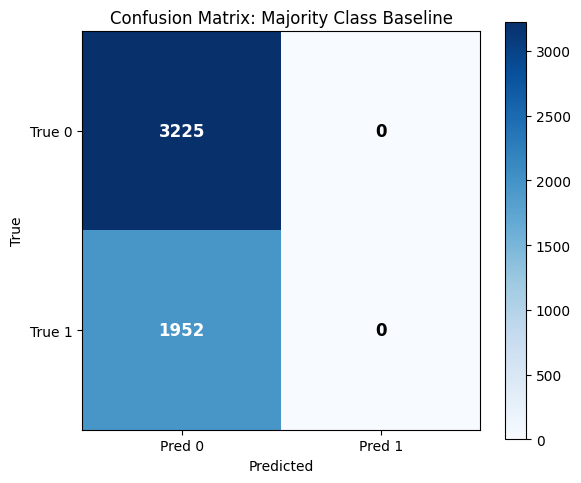

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(cleaned_y_test, baseline_test_preds)

plt.figure(figsize=(6,5))
plt.title("Confusion Matrix: Majority Class Baseline")
plt.imshow(cm, cmap="Blues")
plt.colorbar()

# Axis labels
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black",
                 fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()



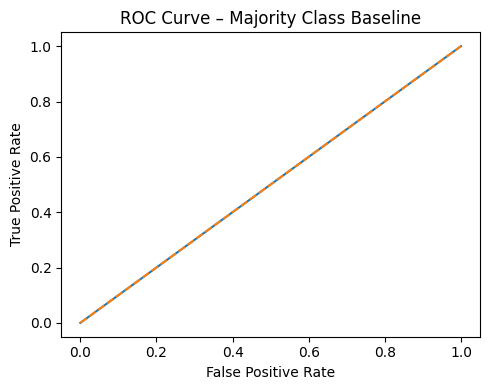

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(cleaned_y_test, baseline_test_preds)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve – Majority Class Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()


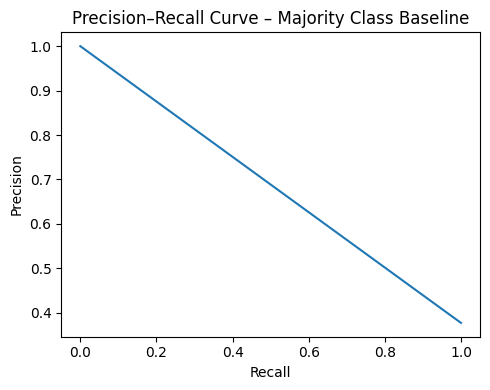

In [11]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(cleaned_y_test, baseline_test_preds)

plt.figure(figsize=(5,4))
plt.plot(recall, precision)
plt.title("Precision–Recall Curve – Majority Class Baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.tight_layout()
plt.show()


In [5]:
pd.set_option('display.max_rows', None)

#  Specific subgroup columns to check performance for
subgroup_cols = ['_SEX', '_EDUCAG', '_SMOKER3', 'ACEDEPRS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH',
       'ACEHURT1', 'ACESWEAR', 'ACETOUCH']

subgroup_results = []

# Subgroup performance
for split_name, X, y in [
    ("Train", cleaned_X_train, cleaned_y_train),
    ("Validation", cleaned_X_val, cleaned_y_val),
    ("Test", cleaned_X_test, cleaned_y_test)
]:
    for col in subgroup_cols:
        if col not in X.columns:
            continue
        
        for group, idx in X.groupby(col).groups.items():
            y_true = y.loc[idx]
            y_pred = np.full(len(y_true), fill_value=majority_class)
            
            subgroup_results.append({
                "Subgroup Variable": col,
                "Group": group,
                "Count": len(y_true),
                **get_metrics(split_name, y_true, y_pred)
            })

# SDisplay subgroup metrics
subgroup_table = pd.DataFrame(subgroup_results)
subgroup_table


,Subgroup Variable,Group,Count,Data,Accuracy,Precision,Recall,F1 Score
0,_SEX,0.0,10863,Train,0.558317,0.0,0.0,0.0
1,_SEX,1.0,13295,Train,0.675668,0.0,0.0,0.0
2,_EDUCAG,1.0,1324,Train,0.796073,0.0,0.0,0.0
3,_EDUCAG,2.0,5936,Train,0.691712,0.0,0.0,0.0
4,_EDUCAG,3.0,6650,Train,0.645113,0.0,0.0,0.0
5,_EDUCAG,4.0,10248,Train,0.546253,0.0,0.0,0.0
6,_SMOKER3,1.0,1704,Train,0.601526,0.0,0.0,0.0
7,_SMOKER3,2.0,659,Train,0.528073,0.0,0.0,0.0
8,_SMOKER3,3.0,6698,Train,0.589280,0.0,0.0,0.0
9,_SMOKER3,4.0,15097,Train,0.644366,0.0,0.0,0.0


In [15]:
def subgroup_metrics(y_true, y_pred, name, n):
    return {
        'Subgroup': name, 'N': n,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0)
    }

In [17]:
sex_results = []
for val, name in [(0, 'Male'), (1, 'Female')]:
    mask = cleaned_X_test['_SEX'] == val
    sex_results.append(subgroup_metrics(cleaned_y_test[mask], baseline_test_preds[mask], name, mask.sum()))

sex_df = pd.DataFrame(sex_results)
print("Performance by Sex:")
print(sex_df.to_string(index=False))

Performance by Sex:
Subgroup    N  Accuracy  Precision  Recall  F1
    Male 2357  0.537972        0.0     0.0 0.0
  Female 2820  0.693972        0.0     0.0 0.0


In [18]:
age_bins = [(18, 30, '18-29'), (30, 45, '30-44'), (45, 60, '45-59'), (60, 100, '60+')]
age_results = []
for lo, hi, name in age_bins:
    mask = (cleaned_X_test['_AGE80'] >= lo) & (cleaned_X_test['_AGE80'] < hi)
    if mask.sum() > 0:
        age_results.append(subgroup_metrics(cleaned_y_test[mask], baseline_test_preds[mask], name, mask.sum()))

age_df = pd.DataFrame(age_results)
print("Performance by Age Group:")
print(age_df.to_string(index=False))

Performance by Age Group:
Subgroup    N  Accuracy  Precision  Recall  F1
   18-29  512  0.535156        0.0     0.0 0.0
   30-44  851  0.538190        0.0     0.0 0.0
   45-59 1117  0.588183        0.0     0.0 0.0
     60+ 2697  0.680756        0.0     0.0 0.0


In [19]:
race_results = []

# White
white = (cleaned_X_test['race_2.0']==0) & (cleaned_X_test['race_3.0']==0) & (cleaned_X_test['race_4.0']==0) & (cleaned_X_test['race_5.0']==0) & (cleaned_X_test['race_6.0']==0)
race_results.append(subgroup_metrics(cleaned_y_test[white], baseline_test_preds[white], 'White', white.sum()))

# Black
black = cleaned_X_test['race_2.0'] == 1
if black.sum() > 0:
    race_results.append(subgroup_metrics(cleaned_y_test[black], baseline_test_preds[black], 'Black', black.sum()))

# Other
other = (cleaned_X_test['race_3.0']==1) | (cleaned_X_test['race_4.0']==1) | (cleaned_X_test['race_5.0']==1) | (cleaned_X_test['race_6.0']==1)
if other.sum() > 0:
    race_results.append(subgroup_metrics(cleaned_y_test[other], baseline_test_preds[other], 'Other', other.sum()))

race_df = pd.DataFrame(race_results)
print("Performance by Race:")
print(race_df.to_string(index=False))

Performance by Race:
Subgroup    N  Accuracy  Precision  Recall  F1
   White 3092  0.566300        0.0     0.0 0.0
   Black  542  0.704797        0.0     0.0 0.0
   Other 1543  0.707712        0.0     0.0 0.0


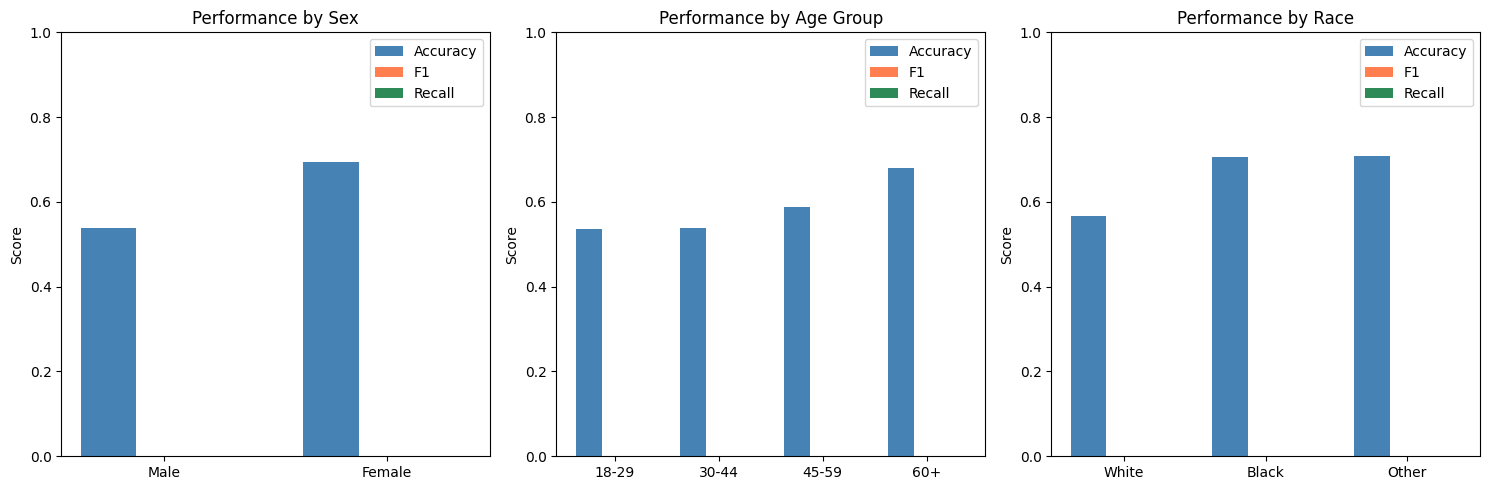

In [20]:
# Visualize subgroup performance
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (df, title) in zip(axes, [(sex_df, 'Sex'), (age_df, 'Age Group'), (race_df, 'Race')]):
    x = np.arange(len(df))
    w = 0.25
    ax.bar(x - w, df['Accuracy'], w, label='Accuracy', color='steelblue')
    ax.bar(x, df['F1'], w, label='F1', color='coral')
    ax.bar(x + w, df['Recall'], w, label='Recall', color='seagreen')
    ax.set_xticks(x)
    ax.set_xticklabels(df['Subgroup'])
    ax.set_ylabel('Score')
    ax.set_title(f'Performance by {title}')
    ax.legend()
    ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

#### _______________________________________________________________________
##### Additional Modellling (not part of the report)

In [ ]:
# Logistic Regression

# Convert data to numpy arrays with explicit float32 type
X_train = cleaned_X_train.values.astype(np.float32)
y_train = cleaned_y_train.values.astype(np.float32)

X_val = cleaned_X_val.values.astype(np.float32)
y_val = cleaned_y_val.values.astype(np.float32)

X_test = cleaned_X_test.values.astype(np.float32)
y_test = cleaned_y_test.values.astype(np.float32)

# Get number of features
n_features = X_train.shape[1]a

# Build logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Make predictions
print("\nEvaluating model...")
y_train_pred = (model.predict(X_train) > 0.5).astype(int).flatten()
y_val_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
y_test_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

metrics_train = get_metrics("Training", cleaned_y_train, y_train_pred)
metrics_val   = get_metrics("Validation", cleaned_y_val, y_val_pred)
metrics_test  = get_metrics("Test", cleaned_y_test, y_test_pred)

print("\nMetrics:")
print(metrics_train)
print(metrics_val)
print(metrics_test)

# Get model weights
weights = model.layers[0].get_weights()
print(f"\nModel coefficients shape: {weights[0].shape}")
print(f"Model bias: {weights[1][0]:.4f}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
755/755 [==============================] - 0s 465us/step - loss: 1.3733 - accuracy: 0.5493 - val_loss: 0.6553 - val_accuracy: 0.6238
Epoch 2/50
755/755 [==============================] - 0s 368us/step - loss: 0.6446 - accuracy: 0.6295 - val_loss: 0.6360 - val_accuracy: 0.6358
Epoch 3/50
755/755 [==============================] - 0s 366us/step - loss: 0.6332 - accuracy: 0.6377 - val_loss: 0.6266 - val_accuracy: 0.6445
Epoch 4/50
755/755 [==============================] - 0s 366us/step - loss: 0.6281 - accuracy: 0.6392 - val_loss: 0.

In [7]:
# Neural Network

# Get number of features
n_features = X_train.shape[1]

# Build neural network 
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_features,)),
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dropout(0.3),  # Randomly drops 30% of neurons
    tf.keras.layers.Dense(1, activation='sigmoid'),  # Output layer
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)

# Make predictions
print("\nEvaluating model...")
y_train_pred = (model.predict(X_train) > 0.5).astype(int).flatten()
y_val_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
y_test_pred = (model.predict(X_test) > 0.5).astype(int).flatten()


metrics_train = get_metrics("Training", cleaned_y_train, y_train_pred)
metrics_val   = get_metrics("Validation", cleaned_y_val, y_val_pred)
metrics_test  = get_metrics("Test", cleaned_y_test, y_test_pred)

print("\nMetrics:")
print(metrics_train)
print(metrics_val)
print(metrics_test)

# Get model weights
print(f"\nNumber of layers: {len(model.layers)}")
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} ({layer.name}) weights shape: {weights[0].shape}, bias shape: {weights[1].shape}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1600      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
378/378 [==============================] - 0s 651us/step - loss: 1.8473 - accuracy: 0.5416 - val_loss: 0.6544 - val_accuracy: 0.6329
Epoch 2/50
378/378 [==============================] - 0s 488us/step - loss: 0.7474 - accuracy: 0.5912 - val_loss: 0.6276 - val_accuracy: 0.632